# Análises exploratórias em dados categóricos nº1

Realizei análises exploratórias em valores categóricos de um Dataset do Kaggle. Esse Dataset possui diversas informações sobre "carros usados".

Fonte dos dados: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

Para essas análises exploratórias tive como objetivo:

1 - Identificar quais os tipos de valores que há em um conjunto de dados categóricos. A variável categórica escolhida foi "tipo_combustivel";

2 - Descobrir quais são os valores únicos dentro de "tipo_combustivel";

3 - Descrever quantas vezes cada valor categórico aparece em "tipo_combustivel";

4 - Revelar quais são os valores de "Index", "Array" e transformar essa variável categórica em um novo dataframe;

5 - Montar um gráfico em barras com valores decrescente para cada tipo de combustível.

*Bibliotecas utilizadas: Pandas, Seaborn

Importando o Dataset

In [77]:
#Vou utilizar a biblioteca pandas para explorar meu conjunto de dados

import pandas as pd

In [78]:
#Agora vou importar o meu conjunto de dados

carros = pd.read_csv("car data.csv")

In [79]:
#Quero visualizar apenas as cinco primeiras linhas

carros.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [80]:
#Checando quantas linhas e quantas colunas há no Dataset?

carros.shape

(301, 9)

In [81]:
#Vou alterar o nome das colunas para nomes em portugues

carros.columns = "nome_do_carro", "ano",	"preco_de_venda" , "preco_atual" ,	"km_dirigidos",	"tipo_combustivel" ,	"tipo_do_vendedor"	, "transmissao", "dono"
carros.head()

,nome_do_carro,ano,preco_de_venda,preco_atual,km_dirigidos,tipo_combustivel,tipo_do_vendedor,transmissao,dono
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Objetivo 1 - Identificar quais os tipos de valores que há em um conjunto de dados categóricos. A variável categórica escolhida foi "tipo_combustivel";

In [92]:
carros.tipo_combustivel

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: tipo_combustivel, Length: 301, dtype: object

Objetivo 2 - Descobrir quais são os valores únicos dentro de "tipo_combustivel";

In [93]:
carros.tipo_combustivel.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

Objetivo 3 - Descrever quantas vezes cada valor categórico aparece em "tipo_combustivel";

In [94]:
carros.tipo_combustivel.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: tipo_combustivel, dtype: int64

Objetivo 4 - Revelar quais são os valores de "Index", "Array" e transformar essa variável categórica em um novo dataframe;

In [95]:
#Checando valores de "Index" e de "Array" da variável "tipo_combustivel"


#Index:

carros.tipo_combustivel.value_counts().index

Index(['Petrol', 'Diesel', 'CNG'], dtype='object')

In [96]:
#Array

carros.tipo_combustivel.value_counts().values

array([239,  60,   2])

In [97]:
#Criando um data frame:

carros.tipo_combustivel.value_counts().to_frame()

,tipo_combustivel
Petrol,239
Diesel,60
CNG,2


In [98]:
#Removendo o index do resultado anterior a fim de criar duas colunas:

carros.tipo_combustivel.value_counts().to_frame().reset_index()

,index,tipo_combustivel
0,Petrol,239
1,Diesel,60
2,CNG,2


In [99]:
#Renomeando esse dataframe

tipo_de_combustivel = carros.tipo_combustivel.value_counts().to_frame().reset_index()

In [100]:
#Irei trocar as legendas das colunas por texto em portugues

tipo_de_combustivel.columns = ['tipo_de_combustivel', 'quantidade']

In [101]:
tipo_de_combustivel.head()

,tipo_de_combustivel,quantidade
0,Petrol,239
1,Diesel,60
2,CNG,2


Objetivo 5 - Montar um gráfico em barras com valores decrescente para cada tipo de combustível.


In [102]:
#Irei usar um gráfico de barras da biblioteca Seaborn

import seaborn as sns

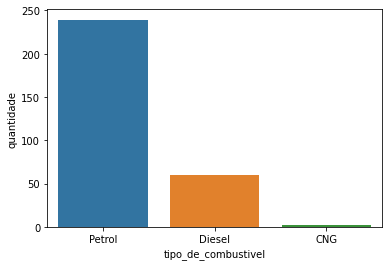

In [103]:
#Determinando ao  seaborn quais sãos os parâmetros do eixo x e do eixo y

#*Observar que o gráfico abaixo foi gerado a partir desse novo Dataframe criado na linha 71

sns.barplot(x = "tipo_de_combustivel", y = "quantidade", data = tipo_de_combustivel)

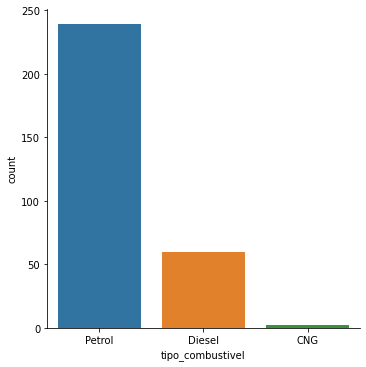

In [104]:
#A forma acima é para criar um gráfico de "baixo nível", ou seja, possuindo maior quantidade de códigos.

#Para fazer um gráfico semelhante, possuindo "alto nível", ou seja, que requeira menor quantidade de códigos fiz o seguinte:

sns.catplot(x = "tipo_combustivel", kind="count", data = carros) # o argumento "kind="count""" automaticamente contabiliza os valores existentes dentro da variável "tipo_combustivel"